In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Real_and_Fake_News_Dataset")

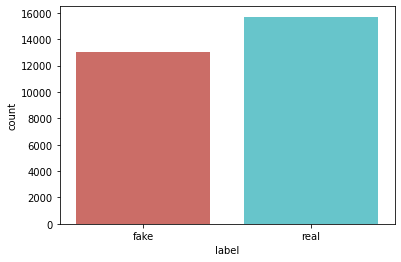

In [4]:
#Create a distribution of labels in dataframe

import seaborn as sb

def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

create_distribution(df)

In [5]:
# Check the data qualtiy to see whether it contains any null values

def data_qualityCheck():
    
    print("Checking data qualitites...")
    df.isnull().sum() # To check whether a row contains null values or not
    df.info()
        
    print("check finished.")

data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28711 entries, 0 to 28710
Data columns (total 3 columns):
Unnamed: 0    28711 non-null int64
content       28665 non-null object
label         28711 non-null object
dtypes: int64(1), object(2)
memory usage: 673.0+ KB
check finished.


In [6]:
# The content column contains null values, so first we have to clean the data

df.dropna(subset = ["content"], inplace=True) # Drops the rows having null data
print(df.shape)

(28665, 3)


In [7]:
# To remove stop words and convert all data into lower case

import re
import string
import pandas as pd
from nltk.corpus import stopwords


def textClean(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return (text)


In [8]:
def cleanup(text):
    text = textClean(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

In [9]:
for ind in df.index:
    df.loc[ind, "content"] = cleanup(df.loc[ind,"content"])

In [10]:
print(df.head())

   Unnamed: 0                                            content label
0           0  politics donald trump republican candidate us ...  fake
1           1  comment melania trump may made homeland famous...  fake
2           2  vehicle shielded metal plates driven suicide a...  real
3           3  3 16  ap  1918 1919    1921   1926     pravdar...  fake
4           4  american food reputation bland but according h...  real


In [11]:
print(df)

       Unnamed: 0                                            content label
0               0  politics donald trump republican candidate us ...  fake
1               1  comment melania trump may made homeland famous...  fake
2               2  vehicle shielded metal plates driven suicide a...  real
3               3  3 16  ap  1918 1919    1921   1926     pravdar...  fake
4               4  american food reputation bland but according h...  real
...           ...                                                ...   ...
28706       28706  0 comments read correctly ugly truth sending b...  fake
28707       28707  since may 1 shortly donald trump clinched repu...  real
28708       28708  want get briefing email  good evening latest 1...  real
28709       28709  posted november 7 2016 lawrence davidson might...  fake
28710       28710  infatuated boy age 12 weeks ago three years ol...  real

[28665 rows x 3 columns]


In [12]:
print(df.tail())

       Unnamed: 0                                            content label
28706       28706  0 comments read correctly ugly truth sending b...  fake
28707       28707  since may 1 shortly donald trump clinched repu...  real
28708       28708  want get briefing email  good evening latest 1...  real
28709       28709  posted november 7 2016 lawrence davidson might...  fake
28710       28710  infatuated boy age 12 weeks ago three years ol...  real


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import seaborn as sns

In [14]:
print(df['content'])
print(df['label'])

0        politics donald trump republican candidate us ...
1        comment melania trump may made homeland famous...
2        vehicle shielded metal plates driven suicide a...
3        3 16  ap  1918 1919    1921   1926     pravdar...
4        american food reputation bland but according h...
                               ...                        
28706    0 comments read correctly ugly truth sending b...
28707    since may 1 shortly donald trump clinched repu...
28708    want get briefing email  good evening latest 1...
28709    posted november 7 2016 lawrence davidson might...
28710    infatuated boy age 12 weeks ago three years ol...
Name: content, Length: 28665, dtype: object
0        fake
1        fake
2        real
3        fake
4        real
         ... 
28706    fake
28707    real
28708    real
28709    fake
28710    real
Name: label, Length: 28665, dtype: object


In [15]:
# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['content'],y,test_size = 0.30)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])
print(count_train.shape)

['00', '000', '0000', '00001400', '000025', '00004', '0001', '00013', '0004', '0004s']
(20065, 167854)


In [16]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

print(tfidf_train.shape)

['00', '000', '0000', '00001400', '000025', '00004', '0001', '00013', '0004', '0004s']
(20065, 167854)


In [17]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier

test_accuracy_for_count_vectorizer = []
models=[]

nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
pred_nb = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred_nb)
print("Testing accuracy for Naive Bayes is :"+str(score))

test_accuracy_for_count_vectorizer.append(score)
models.append("Naive Bayes")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred_nb)
print(cm)



Testing accuracy for Naive Bayes is :0.8732558139534884
[[2982  886]
 [ 204 4528]]


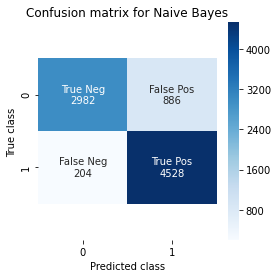

In [25]:
import numpy as np


conf_matrix = metrics.confusion_matrix(y_test, pred_nb)

plt.figure(figsize=(4,4))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
               
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
LABELS = np.asarray(labels).reshape(2,2)



sns.heatmap(conf_matrix, annot=LABELS, fmt='', cmap='Blues')

plt.title("Confusion matrix for Naive Bayes")
plt.ylabel('True class')
plt.xlabel('Predicted class')
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()
plt.show()


In [26]:
logr_classifier = LogisticRegression()

# Fit the classifier to the training data
logr_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
predicted_logr= logr_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, predicted_logr)
print("Testing accuracy of Logistic Regressions is :"+str(score))

test_accuracy_for_count_vectorizer.append(score)
models.append("Logistic Regression")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,predicted_logr)
print(cm)

Testing accuracy of Logistic Regressions is :0.9351162790697675
[[3596  272]
 [ 286 4446]]


C:\Users\sriva\Anaconda3\envs\mlenvs\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


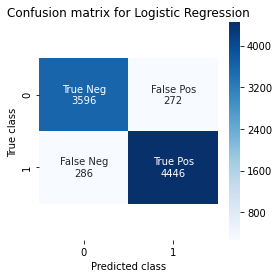

In [28]:
conf_matrix = metrics.confusion_matrix(y_test, predicted_logr)

plt.figure(figsize=(4,4))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
               
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
LABELS = np.asarray(labels).reshape(2,2)



sns.heatmap(conf_matrix, annot=LABELS, fmt='', cmap='Blues')

plt.title("Confusion matrix for Logistic Regression")
plt.ylabel('True class')
plt.xlabel('Predicted class')
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()
plt.show()


In [29]:

# Create a Random Forest classifier: rf_classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
predicted_rf= rf_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, predicted_rf)
print("Testing accuracy of Random Forest :"+str(score))

test_accuracy_for_count_vectorizer.append(score)
models.append("Random Forest")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,predicted_rf)
print(cm)


Testing accuracy of Random Forest :0.8674418604651163
[[3019  849]
 [ 291 4441]]


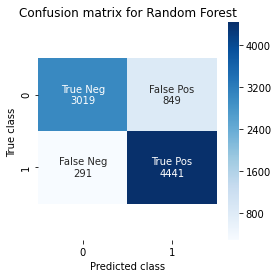

In [30]:
conf_matrix = metrics.confusion_matrix(y_test, predicted_rf)

plt.figure(figsize=(4,4))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
               
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
LABELS = np.asarray(labels).reshape(2,2)



sns.heatmap(conf_matrix, annot=LABELS, fmt='', cmap='Blues')

plt.title("Confusion matrix for Random Forest")
plt.ylabel('True class')
plt.xlabel('Predicted class')
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()
plt.show()


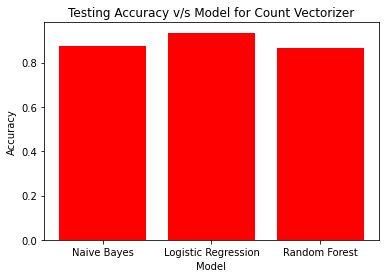

In [31]:
import matplotlib.pyplot as plt

plt.title("Testing Accuracy v/s Model for Count Vectorizer")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.bar(models,test_accuracy_for_count_vectorizer,color='red')
plt.show()

In [32]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier_tfidf

test_accuracy_for_tfidf_vectorizer = []


nb_classifier_tfidf = MultinomialNB()

# Fit the classifier to the training data
nb_classifier_tfidf.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred_nb_tfidf = nb_classifier_tfidf.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred_nb_tfidf)
print("Testing accuracy for Naive Bayes is :"+str(score))

test_accuracy_for_tfidf_vectorizer.append(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred_nb_tfidf)
print(cm)



Testing accuracy for Naive Bayes is :0.7009302325581396
[[1300 2568]
 [   4 4728]]


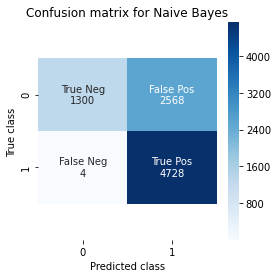

In [33]:
conf_matrix = metrics.confusion_matrix(y_test, pred_nb_tfidf)

plt.figure(figsize=(4,4))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
               
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
LABELS = np.asarray(labels).reshape(2,2)



sns.heatmap(conf_matrix, annot=LABELS, fmt='', cmap='Blues')

plt.title("Confusion matrix for Naive Bayes")
plt.ylabel('True class')
plt.xlabel('Predicted class')
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()
plt.show()


In [34]:
#Train the Logistic Regression classifier

logr_classifier_tfidf = LogisticRegression()

# Fit the classifier to the training data
logr_classifier_tfidf.fit(tfidf_train,y_train)

# Create the predicted tags: pred
predicted_logr_tfidf= logr_classifier_tfidf.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, predicted_logr_tfidf)
print("Testing accuracy of Logistic Regressions is :"+str(score))

test_accuracy_for_tfidf_vectorizer.append(score)


# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,predicted_logr_tfidf)
print(cm)

Testing accuracy of Logistic Regressions is :0.9268604651162791
[[3499  369]
 [ 260 4472]]


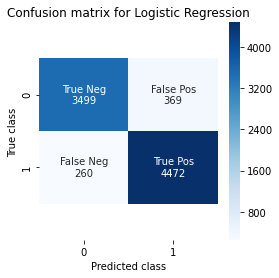

In [35]:
conf_matrix = metrics.confusion_matrix(y_test, predicted_logr_tfidf)

plt.figure(figsize=(4,4))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
               
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
LABELS = np.asarray(labels).reshape(2,2)



sns.heatmap(conf_matrix, annot=LABELS, fmt='', cmap='Blues')

plt.title("Confusion matrix for Logistic Regression")
plt.ylabel('True class')
plt.xlabel('Predicted class')
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()
plt.show()


In [36]:
# Create a Random Forest classifier: rf_classifier
rf_classifier_tfidf = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier_tfidf.fit(tfidf_train,y_train)

# Create the predicted tags: pred
predicted_rf_tfidf= rf_classifier_tfidf.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, predicted_rf_tfidf)
print("Testing accuracy of Random Forest :"+str(score))

test_accuracy_for_tfidf_vectorizer.append(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,predicted_rf_tfidf)
print(cm)


Testing accuracy of Random Forest :0.8715116279069768
[[3035  833]
 [ 272 4460]]


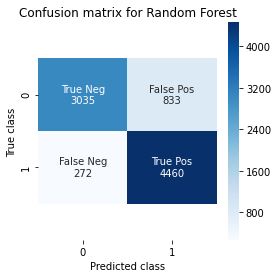

In [37]:
conf_matrix = metrics.confusion_matrix(y_test, predicted_rf_tfidf)

plt.figure(figsize=(4,4))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
               
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
LABELS = np.asarray(labels).reshape(2,2)



sns.heatmap(conf_matrix, annot=LABELS, fmt='', cmap='Blues')

plt.title("Confusion matrix for Random Forest")
plt.ylabel('True class')
plt.xlabel('Predicted class')
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()
plt.show()


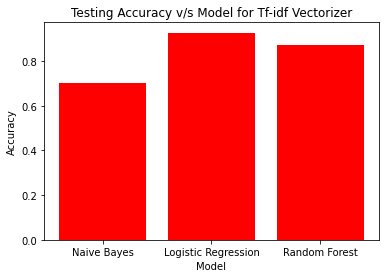

In [38]:
plt.title("Testing Accuracy v/s Model for Tf-idf Vectorizer")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.bar(models,test_accuracy_for_tfidf_vectorizer,color='red')
plt.show()

In [40]:
# Save the best model

import pickle
model_file = 'final_model.sav'
pickle.dump(logr_classifier,open(model_file,'wb'))